# E-tivity 4: CS5062 Overfitting and How to Prevent It 

## Name: Martin Power
## ID      : 9939245

# Lab 4: Comparison of Classifiers

This notebook demonstrates how to choose the best out of a few alternative classification models by applying cross-validation and comparing the accuracy of prediction, the F1-scores and the ROC curves of the classification models.

Here we use a _modified version_ of the __seeds data set__ (see https://archive.ics.uci.edu/ml/datasets/seeds), which is one of the public UCI data sets. Each example is a seed described by a few numerical attributes. The target variable for classification (in this example) is the type of the seed, which can be either 1 or 0. Class 1 are the seeds of a particular type that, we can assume, is important to learn to predict correctly, while class 0 are all other seeds.

In this example, we use 5-fold cross-validation. Empirical evidence suggests that 10 folds are probably the best choice for cross-validation, i.e. 10-fold cross-validation. However, since this data set is relatively small, and 1/10 of it is only 21 examples, it is sensible to use larger folds for testing. Thus, we demonstrate the comparison of classifiers with 5-fold cross-validation.

The code in this notebook was originally inspired by the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html.

## A. Preparation

### Import Python modules

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

from scipy import interp

# Additional imports added for Etivity
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

### Import evaluation and plotting functions

In [176]:
%run ./Lab4_Functions.ipynb

### Load and prepare the dataset for training and evaluating a classifier
Feel free to apply any other pre-processing technique at this point.

In [177]:
# lab4_df = pd.read_csv("./seeds_dataset_binary.csv")
# lab4_df.describe()

In [178]:
# # target attribute
# target = lab4_df['type']

# # predictor attributes
# predictors = lab4_df.drop('type', axis=1).values

# # scale all predictor values to the range [0, 1]
# # note the target attribute 'type' is already binary
# min_max_scaler = preprocessing.MinMaxScaler()
# predictors = min_max_scaler.fit_transform(predictors)

### Prepare an array of 100 equally spaced false-positive-rate values between 0 and 1
To be used as an x-axis in ROC curve plots.

In [179]:
# mean_fpr = np.linspace(start=0, stop=1, num=100)

## B. Evaluation and Comparison of Classifiers

### Train a Probablistic SVM Classifier

In [180]:
# # Create an SVM classifier object as a probabilistic classifier with default parameters
# SVM_classifier = svm.SVC(probability=True)

# # Train and evaluate the classifier by applying 5-fold cross validation.
# # We use 5 folds only, because the data set is rather small.
# accuracies_SVM, f1_scores_SVM, tprs_SVM, aucs_SVM = evaluate_classifier(folds=5, 
#                                                                         p=predictors, t=target, 
#                                                                         classifier=SVM_classifier, 
#                                                                         mean_fpr=mean_fpr)
# # runs k-fold cross validation to measure various metrics of a classifier:
# #        accuracies - an array of accuracies for each fold
# #        f1_scores - an array of F1-scores (also known as F-scores) for each fold
# #        tprs - true positive rates, one per cross-validation fold
# #        aucs - areas below the ROC curve, one per cross-validation fold

In [181]:
# # Plot a ROC curve for each cross-validation fold
# plot_roc_cv_folds(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

In [182]:
# # Plot a mean ROC curve for all cross-validation runs
# plot_roc_mean(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

### Train a Naive Bayes Classifier

In [183]:
# # Create a Naive Bayes classifier object with default parameters (note: Naive Bayes is a probabilistic classifier by default)
# NB_classifier = GaussianNB()

# # Train and evaluate the classifier by applying 5-fold cross validation.
# # We use 5 folds only, because the data set is rather small.
# accuracies_NB, f1_scores_NB, tprs_NB, aucs_NB = evaluate_classifier(folds=5, 
#                                                                     p=predictors, t=target, 
#                                                                     classifier=NB_classifier, 
#                                                                     mean_fpr=mean_fpr)
# # runs k-fold cross validation to measure various metrics of a classifier:
# #        accuracies - an array of accuracies for each fold
# #        f1_scores - an array of F1-scores (also known as F-scores) for each fold
# #        tprs - true positive rates, one per cross-validation fold
# #        aucs - areas below the ROC curve, one per cross-validation fold

In [184]:
# # Plot a ROC curve for each cross-validation fold
# plot_roc_cv_folds(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

In [185]:
# # Plot a mean ROC curve for all cross-validation runs
# plot_roc_mean(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

### Compare All Trained Classifiers

In [186]:
# plot_roc_multiple_classifiers(mean_fpr, 
#                               np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0))), 
#                               np.array([np.mean(aucs_SVM), np.mean(aucs_NB)]), 
#                               np.array(['SVM', 'Naive Bayes']))

In [187]:
# # Compare the statistics of the accuracies across all cross-validation folds
# accuracies_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'Naive Bayes' : accuracies_NB})

In [188]:
# accuracies_df.describe()

In [189]:
# accuracies_df.boxplot()

In [190]:
# # Compare the statistics of the F1-scores across all cross-validation folds
# f1_scores_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 'Naive Bayes' : f1_scores_NB})

In [191]:
# f1_scores_df.describe()

In [192]:
# f1_scores_df.boxplot()

#### Conclusion

In this example, both the SVM and the Naive Bayes classifiers have mean accuracy approximately 88%, which is quite high. The ROC curves do not suggest a clear winner, although it can be noted that Naive Bayes can achieve TPR above 80% for a lower FPR than SVM. On the other hand, the accuracy of the five folds of Naive Bayes show higher variance than the accuracy of the five folds of SVM, and low variance is desirable. Still, the lowest accuracy of Naive Bayes is above 75% which is not bad. Similar observation can be made about the F1 score. Naive Bayes has a higher mean F1 score but also higher variance. Since both SVM and Naive Bayes have high mean accuracy, high mean F1 score and a very similar AUC, while SVM appears to have visibly lower variance than Naive Bayes, we can conclude that perhaps SVM is a safer choice for a best model. 

It will be interesting to plot precision and recall for a more detailed comparison. Since the two classes are not well balanced (1/3 of the examples are in class 1), a precision-recall curve a more detailed study of the precision and recall can provide better information than the ROC curves for picking the best model.

## C. FInal Model

Assuming SVM was chosen, now we can train a final (to be potentially deployed) SVM model with the whole dataset:

In [193]:
# # model = NB_classifier.fit(predictors, target) 
# model = SVM_classifier.fit(predictors, target) 

Use the model to predict the type of three new seeds:

In [194]:
# new_seeds = np.array([[0.4,0.5,0.6,0.5,0.5,0.2,0.3], [0.0,1.0,0.0,1.0,0.5,0.5,0.2], [0.2,0.2,0.2,1.0,0.2,0.2,0.2]])

In [195]:
# # Probabilistic prediction
# np.round(model.predict_proba(new_seeds), 2)
# # Note: 
# #   - the first column are the probabilities for the three new seeds to belong to class 0
# #   - the second column are the probabilities for the three new seeds to belong to class 1

In [196]:
# # Exact prediction
# model.predict(new_seeds)

# Loans Dataset

### Load and prepare the dataset for training and evaluating a classifier
Loading Loans Dataset

In [23]:
loans_df = pd.read_csv("./loans_et4.csv")
loans_df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [118]:
print("Number of Samples  in Dataset:\t",loans_df.shape[0])
print("Number of Features in Dataset:\t",loans_df.shape[1])

Number of Samples  in Dataset:	 480
Number of Features in Dataset:	 12


In [119]:
# Quick Check to Ensure no missing data
print(loans_df.isnull().any())

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool


In [121]:
print("Number of Unique Loan_Status values are ",loans_df['Loan_Status'].nunique())
print("Unique Values and Counts:")
loans_df['Loan_Status'].value_counts()

Number of Unique Loan_Status values are  2
Unique Values and Counts:


1    332
0    148
Name: Loan_Status, dtype: int64

#### Quick Summary on Target Attribute **'Loan_Status'*
* 480 Values
* All values are either 0 or 1
* 69% of values are 1
* 31% of values are 0
   * Distribution is **not balanced!**

In [122]:
# target attribute
target = loans_df['Loan_Status']

# predictor attributes
predictors = loans_df.drop('Loan_Status', axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute 'type' is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

### Prepare an array of 100 equally spaced false-positive-rate values between 0 and 1
To be used as an x-axis in ROC curve plots.

In [197]:
mean_fpr = np.linspace(start=0, stop=1, num=100) 

## B. Evaluation and Comparison of Classifiers

### Setting Number of Folds To Use on **Loans** Dataset

* Seeds dataset only had 210 entries so folds was restricted to 5 folds
    * Each test set had 42 entries
* Loans dataset has 480 entries so it may be possible to use 10 folds
    * Each test set has 48 entries with 10-fold cross validation
    * Each test set has 96 entries with 5-fold cross validation
* Using variable to allow folds to be easily varied and impact on performance observed
    * Using 10-fold validation
    * Will also experiment with 5-fold validation

In [132]:
# Seeds dataset only had 210 entries so folds was restricted to 5
# Loans dataset has 480 entries so it may be possible to use 10 folds
# Using variable to allow folds to be easily varied and impact on performance observed

loan_folds = 10
#loan_folds = 5

### Train a Probablistic SVM Classifier

In [198]:
# Create an SVM classifier object as a probabilistic classifier with default parameters
SVM_classifier = svm.SVC(probability=True, gamma='auto')

accuracies_SVM, f1_scores_SVM, precisions_SVM, recalls_SVM, tprs_SVM, aucs_SVM = evaluate_classifier_upd(folds=loan_folds, 
                                                                        p=predictors, t=target, 
                                                                        classifier=SVM_classifier, 
                                                                        mean_fpr=mean_fpr)

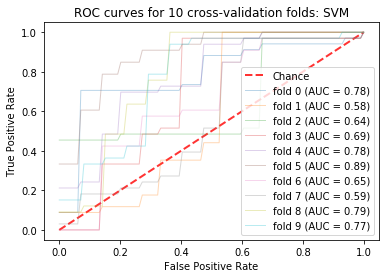

In [199]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

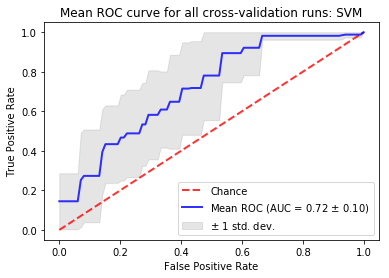

In [200]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

### Train a Naive Bayes Classifier

In [136]:
# Create a Naive Bayes classifier object with default parameters (note: Naive Bayes is a probabilistic classifier by default)
NB_classifier = GaussianNB()

accuracies_NB, f1_scores_NB, precisions_NB, recalls_NB, tprs_NB, aucs_NB = evaluate_classifier_upd(folds=loan_folds, 
                                                                    p=predictors, t=target, 
                                                                    classifier=NB_classifier, 
                                                                    mean_fpr=mean_fpr)

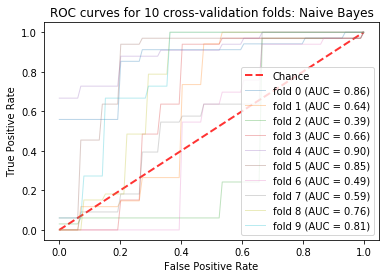

In [137]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

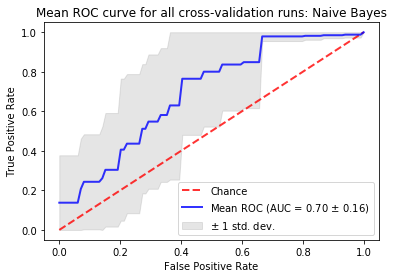

In [138]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

### Train an AdaBoost Classifier

In [139]:
from sklearn.ensemble import AdaBoostClassifier

In [140]:
AB_classifier = AdaBoostClassifier()

accuracies_AB, f1_scores_AB, precisions_AB, recalls_AB, tprs_AB, aucs_AB = evaluate_classifier_upd(folds=loan_folds, 
                                                                        p=predictors, t=target, 
                                                                        classifier=AB_classifier, 
                                                                        mean_fpr=mean_fpr)

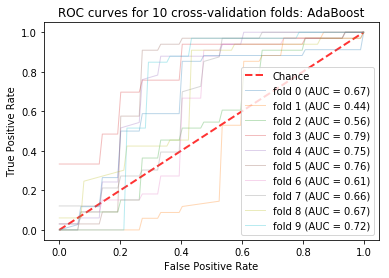

In [141]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_AB, aucs_AB, 'AdaBoost')

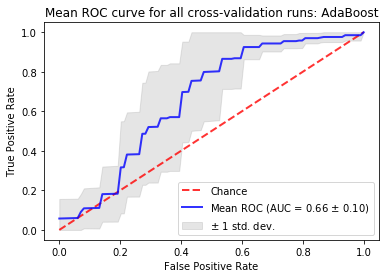

In [36]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_AB, aucs_AB, 'AdaBoost')

### Compare All Trained Classifiers

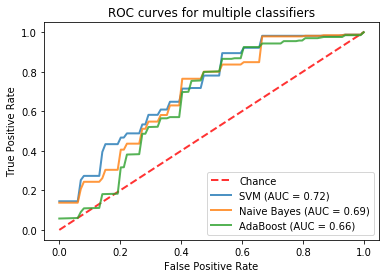

In [211]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0), np.mean(tprs_AB, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB), np.mean(aucs_AB)]), 
                              np.array(['SVM', 'Naive Bayes', 'AdaBoost']))

In [212]:
# Compare the statistics of the accuracies across all cross-validation folds
accuracies_loans_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'Naive Bayes' : accuracies_NB, 'AdaBoost' : accuracies_AB})

In [213]:
accuracies_loans_df.describe()

,SVM,Naive Bayes,AdaBoost
count,10.000000,10.000000,10.000000
mean,0.808650,0.787732,0.779519
std,0.042218,0.079246,0.045352
min,0.755102,0.625000,0.708333
25%,0.770833,0.770833,0.759035
50%,0.803997,0.783588,0.789450
75%,0.846631,0.834998,0.791667
max,0.872340,0.893617,0.851064


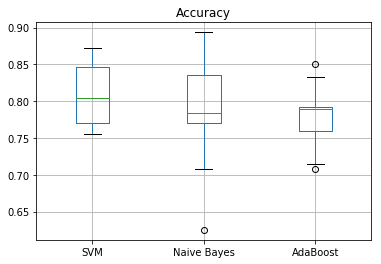

In [154]:
fig, ax = plt.subplots()
ax.set_title("Accuracy")

accuracies_loans_df.boxplot(ax=ax)

In [155]:
# Compare the statistics of the F1-scores across all cross-validation folds
f1_scores_loans_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 'Naive Bayes' : f1_scores_NB, 'AdaBoost' : f1_scores_AB})

In [156]:
f1_scores_loans_df.describe()

,SVM,Naive Bayes,AdaBoost
count,10.000000,10.000000,10.000000
mean,0.876583,0.857474,0.850967
std,0.025271,0.055906,0.032107
min,0.842105,0.735294,0.805556
25%,0.854286,0.853039,0.829976
50%,0.875769,0.853333,0.852941
75%,0.898279,0.891641,0.866594
max,0.916667,0.929577,0.901408


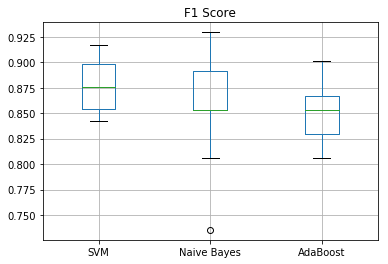

In [157]:
fig, ax = plt.subplots()
ax.set_title("F1 Score")

f1_scores_loans_df.boxplot(ax=ax)

# Task 1 Conclusions

A summary of the mean values for Accuracy, F1 Score and AUC are given in the following table for the three trained classifiers:

| Measure  | SVM  | Naive Bayes | AdaBoost |
|----------|------|-------------|----------|
| Accuracy | 0.81 | 0.79        | 0.78     |
| F1 Score | 0.88 | 0.86        | 0.85     |
| AUC      | 0.72 | 0.70        | 0.66     |

## Accuracy

* All three models have accuracies in the region of 78-81% with SVM being the highest
* SVM also has the lowest variance which is important
* The Naive Bayes variance looks much higher than the SVM variance in the boxplot
    * On occasion NB delivers higher accuracy than SVM (e.g. 89%)
    * However, it also delivers much lower accuracy on occasion (e.g. 0.63%)
    * This variance is too significant to make NB a better choice than SVM on accuracy
* **Best Accuracy** : SVM
* *When dataset is imbalanced, F1 score can be a more appropriate measure*

## F1 Score

* SVM has both higher F1 score and lower, or equivalent, variance to Naive Bayes and AdaBoost
* The minimum F1 score obtained by SVM (0.84) is higher than AdaBoost (0.81) and significantly higher than NB(0.74)
* **Best Accuracy** : SVM

| *Accuracy* | SVM  | Naive Bayes | AdaBoost | *F1 Score* | SVM  | Naive Bayes | AdaBoost |
|----------|------|-------------|----------|----------|------|-------------|----------|
| mean     | 0.81 | 0.79        | 0.78     | mean     | 0.88 | 0.86        | 0.85     |
| std      | 0.04 | 0.08        | 0.05     | std      | 0.03 | 0.06        | 0.03     |
| min      | 0.76 | 0.63        | 0.71     | min      | 0.84 | 0.74        | 0.81     |
| 25%      | 0.77 | 0.77        | 0.76     | 0.25     | 0.85 | 0.85        | 0.83     |
| 50%      | 0.80 | 0.78        | 0.79     | 0.50     | 0.88 | 0.85        | 0.85     |
| 75%      | 0.85 | 0.83        | 0.79     | 0.75     | 0.90 | 0.89        | 0.87     |
| max      | 0.87 | 0.89        | 0.85     | max      | 0.92 | 0.93        | 0.90     |

## ROC Curve and AUC Score

* SVM has a higher mean AUC than NB and AdaBoost
* This means that on average SVM is delivering a more skilful model than NB or AdaBoost
* **Best AUC** : SVM

## Overall Winner

* When comparing accuracy, F1 and AUC, SVM delivers clearly better results than NB or AdaBoost
* **Best Model** : SVM

# Task 2 Precison and Recall Boxplots

### Determine Point of Skill/No-Skill for Dataset
* Details taken from article at https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
* When discussing presicion-recall curves, the article states :*The no-skill line is defined by the total number of positive cases divide by the total number of positive and negative cases. For a dataset with an equal number of positive and negative cases, this is a straight line at 0.5. Points above this line show skill.*
* I originally included this code when plotting precision-recall curves however I will still include this line on the precision box plots
* As the dataset is imbalanced, the skill line is not at 0.5 and instead is at 0.69


In [214]:
# Determine No Skill Value
total_pos = ((target == 1).sum())
total_neg = ((target != 1).sum())

no_skill = total_pos/(total_pos+total_neg)

print("No Skill Level for This Dataset is:\t",no_skill)

No Skill Level for This Dataset is:	 0.6916666666666667


In [215]:
# Compare the statistics of the precisions across all cross-validation folds
precisions_loans_df = pd.DataFrame(data={'SVM' : precisions_SVM, 'Naive Bayes' : precisions_NB, 'AdaBoost' : precisions_AB})

In [216]:
precisions_loans_df.describe()

,SVM,Naive Bayes,AdaBoost
count,10.000000,10.000000,10.000000
mean,0.794473,0.799070,0.798735
std,0.039146,0.054635,0.034343
min,0.750000,0.714286,0.743590
25%,0.761905,0.761905,0.769331
50%,0.779070,0.795006,0.807692
75%,0.836707,0.850000,0.827311
max,0.846154,0.868421,0.842105


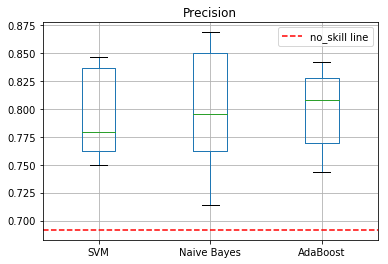

In [47]:
# Show the line of "no skill" on the boxplot
# "no skill" concept is taken from 
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
fig, ax = plt.subplots()
ax.axhline(no_skill, color='r', ls='--', label='no_skill line')
ax.legend()
ax.set_title("Precision")

precisions_loans_df.boxplot(ax=ax,)

In [161]:
# Compare the statistics of the accuracies across all cross-validation folds
recalls_loans_df = pd.DataFrame(data={'SVM' : recalls_SVM, 'Naive Bayes' : recalls_NB, 'AdaBoost' : recalls_AB})

In [162]:
recalls_loans_df.describe()

,SVM,Naive Bayes,AdaBoost
count,10.000000,10.000000,10.000000
mean,0.978966,0.927451,0.913102
std,0.020076,0.074536,0.058228
min,0.941176,0.757576,0.823529
25%,0.969697,0.886364,0.878788
50%,0.969697,0.955437,0.909091
75%,1.000000,0.969697,0.962121
max,1.000000,1.000000,1.000000


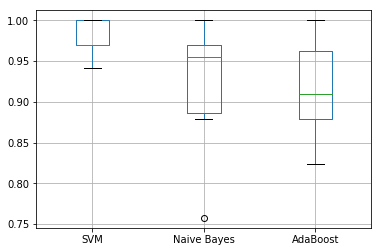

In [163]:
recalls_loans_df.boxplot()

# Task 2 Conclusions

|*Precision*| SVM  | Naive Bayes | AdaBoost |*Recall*| SVM  | Naive Bayes | AdaBoost |
|-----------|------|-------------|----------|--------|------|-------------|----------|
| mean      | 0.79 | 0.80        | 0.80     | mean   | 0.98 | 0.93        | 0.91     |
| std       | 0.04 | 0.05        | 0.03     | std    | 0.02 | 0.07        | 0.06     |
| min       | 0.75 | 0.71        | 0.74     | min    | 0.94 | 0.76        | 0.82     |
| 25%       | 0.76 | 0.76        | 0.77     | 25%    | 0.97 | 0.89        | 0.88     |
| 50%       | 0.78 | 0.80        | 0.81     | 50%    | 0.97 | 0.96        | 0.91     |
| 75%       | 0.84 | 0.85        | 0.83     | 75%    | 1.00 | 0.97        | 0.96     |
| max       | 0.85 | 0.87        | 0.84     | max    | 1.00 | 1.00        | 1.00     |


## ROC Curve and AUC Score

* SVM has a higher mean AUC than NB and AdaBoost
* This means that on average SVM is delivering a more skilful model than NB or AdaBoost
* **Best AUC** : SVM

## Precision

* Precision is the ability of a classifier to not label a *true negative* as positive
* In the case of the loans dataset, identifying a true negative as positive would
  mean the ability to not approve a loan for an applicant who should not get a loan 
  due to being at risk of not being able to repay the loan
* This is very important from this particular business application as it will minimse losses
  due to bad debt
  
  
* All three models have similar mean precision scores of about 0.8
* NB shows a lot more variance than SVM or AdaBoost for Precision
* Interestingly, unlike the previou metrics AdaBoost is outperforming SVM
  in terms of precision, delivering a higher mean prevision with a lower variance
* This suggests that on average AdaBoost may deliver higher precision than SVM
* **Best Precision** : AdaBoost

## Recall

* Recall is the ability of a classifier to find positive examples
* This measures how few true positives were incorrectly labelled as false negatives
* A score of 1.0 means all true positives were identified
* From a loans dataset perspective, this means the ability of the classifier to identify
  all potential positive applicants who would qualify for a loan
* High recall will ensure all potential good customers are identified and will allow the bank
  to maximise profits if a model with both high precision and high recall is chosen
  
  
* SVM significantly beats NB and AdaBoost in terms of recall with a mean score of 0.98
* This means SVM identifies practially all positive applicants on average
* In contrast, NB and AdaBoost lose between 7-9% of positive applicants on average
* **Best Recall** :SVM

## Overall Winner

* AdaBoost has better precision than SVM but the SVM precision performance is not signifcantly worse than AdaBoost
* In contrast, SVM has significantly better Recall performance than both AdaBoost and NB
* Considering, both precision and recall together SVM is the best model to choose for this application
* **Best Model** : SVM

# Task 3 Model Improvement by Parameter Exploration

* The task states *Assume that it is important to minimise the false positives (i.e., Loan_Status predicted to be 1 wrongly).*
* This means the model should be explored in order to improve precision
* In the previous analysis, AdaBoost beat SVM in terms of precision but overall SVM was still the best model
* I am going to use GridSearchCV to explore the parameter space and I am going to set *scoring='precision'* in order to optimise with regards to precision over other metrics
    * **NOTE** : I am restricting the exploration to this metric for the sake of time on this Etivity. It would be interesting to explore across other metrics
* As AdaBoost showed promise in terms of precison with an out-of-the-box implementation, I also want to explore optimizing AdaBoost to see if its precision performance can get even better
* Therefore I will optimise both AdaBoost and SVM

## Task 3.1 AdaBoost Parameter Exploration

In [ ]:
# AdaBoost GridSearch
# From https://stackoverflow.com/questions/32210569/using-gridsearchcv-with-adaboost-and-decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Parameters to be explored
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
               "n_estimators": [50, 100, 200],
               "learning_rate": [0.1, 0.2, 0.4, 0.8, 1.0]
              }

# Keep Decision Tree as Base Estimator but explore parameters used
# by Decision Tree within AdaBoost
dtc = DecisionTreeClassifier(max_depth=1)

ABC = AdaBoostClassifier(base_estimator=dtc)

# run grid search
grid_search_ABC = GridSearchCV(ABC, cv=loan_folds, param_grid=param_grid, scoring='precision' )

In [90]:
# View Parameters for the Search
grid_search_ABC.get_params()

{'cv': 10,
 'error_score': 'raise-deprecating',
 'estimator__algorithm': 'SAMME.R',
 'estimator__base_estimator__class_weight': None,
 'estimator__base_estimator__criterion': 'gini',
 'estimator__base_estimator__max_depth': 1,
 'estimator__base_estimator__max_features': None,
 'estimator__base_estimator__max_leaf_nodes': None,
 'estimator__base_estimator__min_impurity_decrease': 0.0,
 'estimator__base_estimator__min_impurity_split': None,
 'estimator__base_estimator__min_samples_leaf': 1,
 'estimator__base_estimator__min_samples_split': 2,
 'estimator__base_estimator__min_weight_fraction_leaf': 0.0,
 'estimator__base_estimator__presort': False,
 'estimator__base_estimator__random_state': None,
 'estimator__base_estimator__splitter': 'best',
 'estimator__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_lea

In [91]:
# Perform Grid Search
grid_search_ABC.fit(predictors, target)

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.2, 0.4, 0.8, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [92]:
# Create object based on best parameters found
grid_clf = grid_search_ABC.best_estimator_

In [225]:
# View the best parameters found via grid search
grid_search_ABC.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'random',
 'learning_rate': 0.1,
 'n_estimators': 200}

In [96]:
# Get metrics based on the new parameters
accuracies_ABC, f1_scores_ABC, precisions_ABC, recalls_ABC, tprs_ABC, aucs_ABC, = evaluate_classifier_upd(
                                                                        folds=loan_folds, 
                                                                        p=predictors, t=target, 
                                                                        classifier=grid_clf, 
                                                                        mean_fpr=mean_fpr)

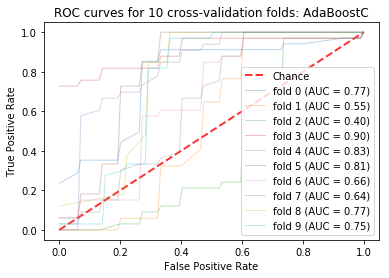

In [97]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_ABC, aucs_ABC, 'AdaBoostC')

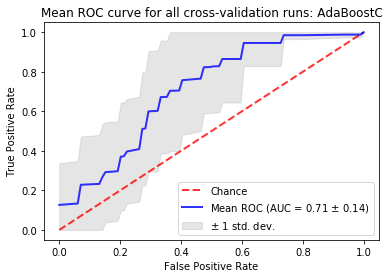

In [98]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_ABC, aucs_ABC, 'AdaBoostC')

## Task 3.2 SVM Parameter Exploration

In [ ]:
# Parameters to be varied
C_vals = [0.001, 0.01, 0.1, 1, 10]
gamma_vals = [0.001, 0.01, 0.1, 1, 'scale']
kernel_vals = ['rbf', 'poly', 'sigmoid', 'linear']
param_grid = {'C': C_vals, 
              'kernel' : kernel_vals,
              'gamma' : gamma_vals}

SVC  = svm.SVC(probability=True)

# run grid search
grid_search_SVC = GridSearchCV(SVC, cv=loan_folds, param_grid=param_grid, scoring='precision' )

In [226]:
# View parameters for search
grid_search_SVC.get_params()

{'cv': 10,
 'error_score': 'raise-deprecating',
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'auto_deprecated',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': True,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=True, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
 'fit_params': None,
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': {'C': [0.001, 0.01, 0.1, 1, 10],
  'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
  'gamma': [0.001, 0.01, 0.1, 1, 'scale']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 

In [100]:
# Perform GridSearch
grid_search_SVC.fit(predictors, target)

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'gamma': [0.001, 0.01, 0.1, 1, 'scale']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [101]:
# Build new SVM classifier based on best parameters
grid_svc = grid_search_SVC.best_estimator_

In [227]:
# View best parameters
grid_search_SVC.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [105]:
# Get metrics based on the new parameters
accuracies_SVC, f1_scores_SVC, precisions_SVC, recalls_SVC, tprs_SVC, aucs_SVC, = evaluate_classifier_upd(
                                                                        folds=loan_folds, 
                                                                        p=predictors, t=target, 
                                                                        classifier=grid_svc, 
                                                                        mean_fpr=mean_fpr)

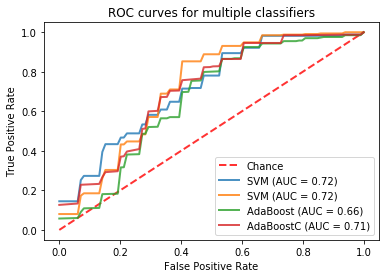

In [230]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_SVC, axis=0), np.mean(tprs_AB, axis=0), np.mean(tprs_ABC, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_SVC), np.mean(aucs_AB), np.mean(aucs_ABC)]), 
                              np.array(['SVM', 'SVM', 'AdaBoost', 'AdaBoostC']))

In [231]:
# Compare the statistics of the accuracies across all cross-validation folds
accuracies_loans_cv_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'SVMC' : accuracies_SVC, 'AdaBoost' : accuracies_AB,'AdaBoostC' : accuracies_ABC})

In [232]:
accuracies_loans_cv_df.describe()

,SVM,SVMC,AdaBoost,AdaBoostC
count,10.000000,10.000000,10.000000,10.000000
mean,0.808650,0.806567,0.779519,0.812818
std,0.042218,0.041370,0.045352,0.056282
min,0.755102,0.755102,0.708333,0.687500
25%,0.770833,0.770833,0.759035,0.796875
50%,0.803997,0.802083,0.789450,0.812500
75%,0.846631,0.842380,0.791667,0.858337
max,0.872340,0.872340,0.851064,0.875000


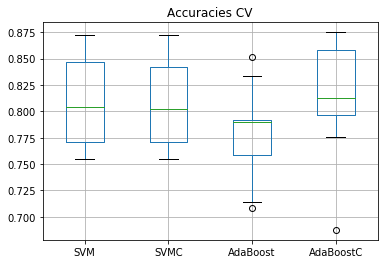

In [233]:
fig, ax = plt.subplots()
ax.set_title("Accuracies CV")

accuracies_loans_cv_df.boxplot(ax=ax)

In [217]:
# Compare the statistics of the F1-scores across all cross-validation folds
f1_scores_loans_cv_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 'SVMC' : f1_scores_SVC, 'AdaBoost' : f1_scores_AB,'AdaBoostC' : f1_scores_ABC})

In [218]:
f1_scores_loans_cv_df.describe()

,SVM,SVMC,AdaBoost,AdaBoostC
count,10.000000,10.000000,10.000000,10.000000
mean,0.876583,0.874089,0.850967,0.876900
std,0.025271,0.026436,0.032107,0.037065
min,0.842105,0.840580,0.805556,0.794521
25%,0.854286,0.854286,0.829976,0.866040
50%,0.875769,0.872567,0.852941,0.880000
75%,0.898279,0.896836,0.866594,0.906494
max,0.916667,0.916667,0.901408,0.916667


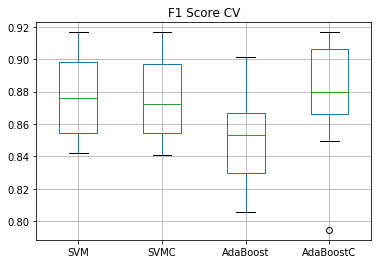

In [219]:
fig, ax = plt.subplots()
ax.set_title("F1 Score CV")

f1_scores_loans_cv_df.boxplot(ax=ax)

In [207]:
# Compare the statistics of the precisions across all cross-validation folds
precisions_loans_cv_df = pd.DataFrame(data={'SVM' : precisions_SVM, 'SVMC' : precisions_SVC, 'AdaBoost' : precisions_AB, 'AdaBoostC' : precisions_ABC})

In [208]:
precisions_loans_cv_df.describe()

,SVM,SVMC,AdaBoost,AdaBoostC
count,10.000000,10.000000,10.000000,10.000000
mean,0.794473,0.796787,0.798735,0.805299
std,0.039146,0.036746,0.034343,0.041932
min,0.750000,0.750000,0.743590,0.725000
25%,0.761905,0.763289,0.769331,0.785714
50%,0.779070,0.795349,0.807692,0.792785
75%,0.836707,0.832968,0.827311,0.842949
max,0.846154,0.846154,0.842105,0.864865


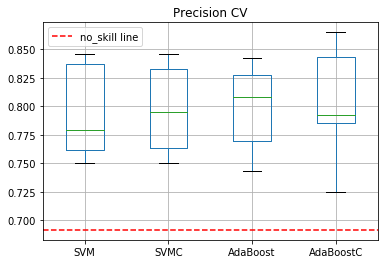

In [210]:
# Show the line of "no skill" on the boxplot
# "no skill" concept is taken from 
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
fig, ax = plt.subplots()
ax.axhline(no_skill, color='r', ls='--', label='no_skill line')
ax.legend()
ax.set_title("Precision CV")

precisions_loans_cv_df.boxplot(ax=ax,)

In [220]:
recalls_loans_cv_df = pd.DataFrame(data={'SVM' : recalls_SVM, 'SVMC' : recalls_SVC, 'AdaBoost' : recalls_AB, 'AdaBoostC' : recalls_ABC})

In [221]:
recalls_loans_cv_df.describe()

,SVM,SVMC,AdaBoost,AdaBoostC
count,10.000000,10.000000,10.000000,10.000000
mean,0.978966,0.969875,0.913102,0.963904
std,0.020076,0.037640,0.058228,0.046606
min,0.941176,0.878788,0.823529,0.878788
25%,0.969697,0.969697,0.878788,0.926248
50%,0.969697,0.969697,0.909091,0.984848
75%,1.000000,1.000000,0.962121,1.000000
max,1.000000,1.000000,1.000000,1.000000


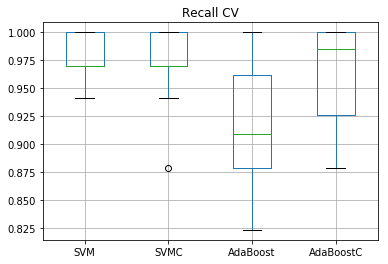

In [222]:
fig, ax = plt.subplots()
ax.set_title("Recall CV")

recalls_loans_cv_df.boxplot(ax=ax,)

## Task 3 AdaBoost GridSearch Conclusions

Based on GridSearchCV, the best parameters were found in order to optimise precision. A comparison of the parameters found during GridSearchCV versus the default parameters used in the original run are provided in the following table:

| AdaBoost Parameters       | Default Value | GridSearchCV Value |
|---------------------------|---------------|--------------------|
| base_estimator__criterion | gini          | gini               |
| base_estimator__splitter  | best          | random             |
| learning_rate             | 1             | 0.1                |
| n_estimators              | 50            | 200                |

#### Performance Change with GridSearch
* Accuracy
    * Mean accuracy improved by 3% at the cost of a 1% increase in variance
* F1 Score
    * The F1 improved similar to accuracy in that a 3% increase in mean F1 came at expense of 1% increase in variance
* Precision
    * As the scoring metric was set to "precision", of all the metrics this is the one where an improve is expected
    * A performance did occur but it was only ~1% and again came with an increase in variance
* Recall
    * Recall showed the biggest improvement of 5% and with a reduction in varinace
* AUC
    * The mean AUC jumped by 5% which suggests that on average a more skilful model is being delivered after applying the parameters found using Gridsearch CV


| Measure   | AdaBoost | AdaBoostC | Delta  |
|-----------|----------|-----------|--------|
| **Accuracy**      |
| mean      | 0.78     | 0.81      | 0.033  |
| std       | 0.05     | 0.06      | 0.011  |
| **F1**         |
| mean      | 0.85     | 0.88      | 0.026  |
| std       | 0.03     | 0.04      | 0.005  |
| **Precision**        |
| mean      | 0.80     | 0.81      | 0.007  |
| std       | 0.03     | 0.04      | 0.008  |
| **Recall**          |
| mean      | 0.91     | 0.96      | 0.051  |
| std       | 0.06     | 0.05      | -0.012 |
| **AUC**          |
| Mean | 0.66 | 0.71 | 0.050 |

## Task 3 SVM GridSearch Conclusions

Based on GridSearchCV, the best parameters were found in order to optimise precision. A comparison of the parameters found during GridSearchCV versus the default parameters used in the original run are provided in the following table:

| SVM Parameters | Default Value | GridSearchCV Value |
|----------------|---------------|--------------------|
| C              | 1             | 10                 |
| gamma          | auto          | 0.1                |
| kernel         | rbf           | sigmoid            |

#### Performance Change with GridSearch
* Accuracy
    * There is a negligible change in mean accuracy between the default parameters and the parameters found using GridSearchCV
* F1 Score
    * There is a negligible change in mean F1 Score between the default parameters and the parameters found using GridSearchCV
* Precision
    * As the scoring metric was set to "precision", of all the metrics this is the one where an improve is expected
    * A performance did occur but it was only ~1%. However, unlike AdaBoost it did come at the expense of increase variance
* Recall
    * Recall showed a moderate drop in performance and an increase in variance
* AUC
    * There is a negligible change in mean AUC which means that the average skill delivered by the SVM model is about the same for both sets of parameters
    
    
| Measure   | SVM  | SVMC | Delta  |
|-----------|------|------|--------|
| **Accuracy**          |
| mean      | 0.81 | 0.81 | -0.002 |
| std       | 0.04 | 0.04 | -0.001 |
| **F1**            |
| mean      | 0.88 | 0.87 | -0.002 |
| std       | 0.03 | 0.03 | 0.001  |
| **Precision**        |
| mean      | 0.79 | 0.80 | 0.002  |
| std       | 0.04 | 0.04 | -0.002 |
|**Recall**           |
| mean      | 0.98 | 0.97 | -0.009 |
| std       | 0.02 | 0.04 | 0.018  |
| **AUC**    |
| Mean | 0.72 | 0.72 | 0.000 |

#  Task 3 Final Conclusions

* During the initial analysis, SVM was clearly the best model and beat AdaBoost on all metrics except Precison
* After running GridSearchCV, it is no longer as clear that SVM is the best model
* GridSearchCV did not meaningful improve the performance of SVM but it did improve the performance of AdaBoost

#### Performance Comparison After GridSearch
* Accuracy
    * AdaBoost now achieves the same mean accuracy as SVM (0.81) but with slightly worse variance
* F1 Score
    * AdaBoost now achieves the same mean F1 Score as SVM (0.88) but with slightly worse variance
* Precision
    * AdaBoost has higher precision than SVM although the variance went up after GridSearch
* Recall
    * AdaBoost got a 5% increase in Recall and no only lags SVM by 2% instea of 7%
    * However the Recall variance of AdaBoost is still 2.5x the variance of SVM
* AUC
    * The AdaBoost AUC is improved by 5% which brings it within 1% of SVM

| Measure   | SVM  | SVMC | AdaBoost | AdaBoostC |
|-----------|------|------|----------|-----------|
| **Accuracy**         |
| mean      | 0.81 | 0.81 | 0.78     | 0.81      |
| std       | 0.04 | 0.04 | 0.05     | 0.06      |
| **F1**                   |
| mean      | 0.88 | 0.87 | 0.85     | 0.88      |
| std       | 0.03 | 0.03 | 0.03     | 0.04      |
| **Precision**          |
| mean      | 0.79 | 0.80 | 0.80     | 0.81      |
| std       | 0.04 | 0.04 | 0.03     | 0.04      |
| **Recall**             |
| mean      | 0.98 | 0.97 | 0.91     | 0.96      |
| std       | 0.02 | 0.04 | 0.06     | 0.05      |
| **AUC**             |
| mean      | 0.72 | 0.72 | 0.66     | 0.71      |

## Overall Winner after GridSearchCV

* AdaBoost has better precision than SVM but the SVM precision performance is not signifcantly worse than AdaBoost
* In contrast, SVM has significantly better Recall performance than both AdaBoost and NB
* Considering, both precision and recall together SVM is the best model to choose for this application
* The performance of AdaBoost after GridSearchCV was significantly improved relative to the default values of AdaBoost
* It is now comparable to SVM on almost all mean metrics
* However, for all metrics SVM has equivalent or lower variance to AdaBoost meaning that on average the SVM models are more stable and consistent at producing results
* **Best Model** : SVM